In [1]:
import numpy as np
import matplotlib.pyplot as plt

***Parameters***

In [2]:
Fs = 1000.0
duration = 1.0
N = int(Fs * duration)
t = np.arange(N) / Fs

***Q1: Single sinusoid***

***(a) generate sinusoid***

In [3]:
f1 = 5.0
x1 = np.sin(2 * np.pi * f1 * t)

***(b) time-domain plot (show first 200 samples for clarity)***

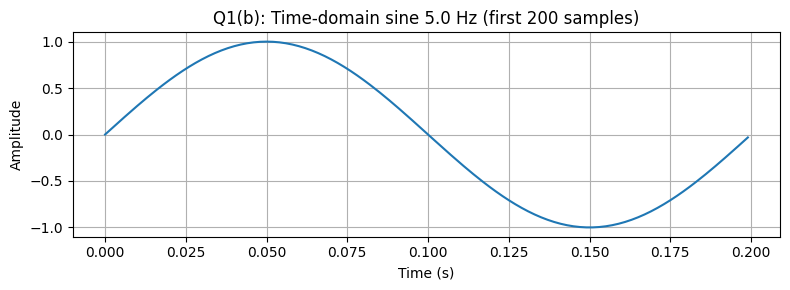

In [4]:
plt.figure(figsize=(8,3))
plt.plot(t[:200], x1[:200])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Q1(b): Time-domain sine {f1} Hz (first 200 samples)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#Utility: DTFT (high-resolution)
def compute_dtft(x, Fs, Nfreq=4096):
    n = np.arange(len(x))
    f = np.linspace(-Fs/2, Fs/2, Nfreq)
    W = np.exp(-1j * 2 * np.pi * np.outer(n, f) / Fs)
    X = np.dot(x, W)
    return f, X

***(c) DTFT (continuous-like)***

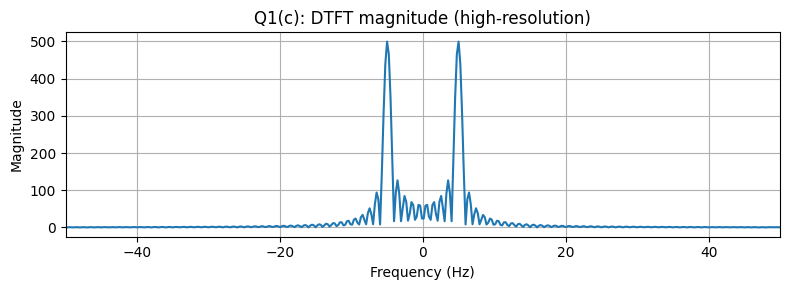

In [7]:
f_dtft, X_dtft = compute_dtft(x1, Fs, Nfreq=4096)
plt.figure(figsize=(8,3))
plt.plot(f_dtft, np.abs(X_dtft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q1(c): DTFT magnitude (high-resolution)')
plt.xlim(-50, 50)
plt.grid(True)
plt.tight_layout()
plt.show()

***(d) DFT using FFT (zero-pad to improve frequency sampling)***

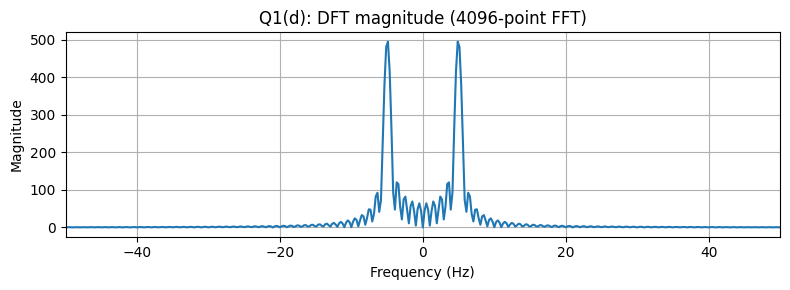

In [8]:
Nfft = 4096
X_fft = np.fft.fftshift(np.fft.fft(x1, n=Nfft))
f_fft = np.fft.fftshift(np.fft.fftfreq(Nfft, d=1.0/Fs))
plt.figure(figsize=(8,3))
plt.plot(f_fft, np.abs(X_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q1(d): DFT magnitude (4096-point FFT)')
plt.xlim(-50, 50)
plt.grid(True)
plt.tight_layout()
plt.show()

***Q2: Composite signal (sum of two sinusoids)***

***(a) compose two sinusoids***

In [9]:
f_a, A_a = 50.0, 1.0
f_b, A_b = 120.0, 0.6
phase_b = 0.3
x2 = A_a * np.sin(2*np.pi*f_a*t) + A_b * np.sin(2*np.pi*f_b*t + phase_b)

***(b) time-domain plot (show chunk)***

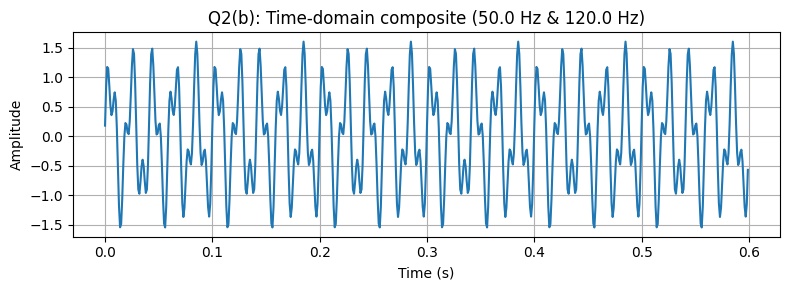

In [10]:
plt.figure(figsize=(8,3))
plt.plot(t[:600], x2[:600])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Q2(b): Time-domain composite ({f_a} Hz & {f_b} Hz)')
plt.grid(True)
plt.tight_layout()
plt.show()

***(c) DTFT***

In [14]:
def compute_dtft(x, Fs, Nfreq=4096):
    n = np.arange(len(x))
    f = np.linspace(-Fs/2, Fs/2, Nfreq)
    W = np.exp(-1j * 2 * np.pi * np.outer(n, f) / Fs)
    X = np.dot(x, W)
    return f, X

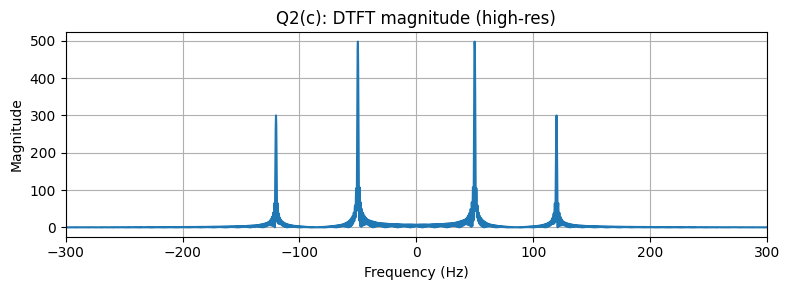

In [17]:
f_dtft2, X_dtft2 = compute_dtft(x2, Fs, Nfreq=4096)
plt.figure(figsize=(8,3))
plt.plot(f_dtft2, np.abs(X_dtft2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q2(c): DTFT magnitude (high-res)')
plt.xlim(-300, 300)
plt.grid(True)
plt.tight_layout()
plt.show()

***(d) DFT (FFT)***

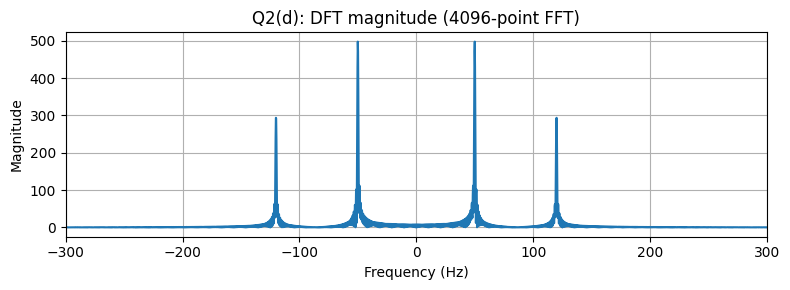

In [18]:
Nfft = 4096
X_fft2 = np.fft.fftshift(np.fft.fft(x2, n=Nfft))
f_fft2 = np.fft.fftshift(np.fft.fftfreq(Nfft, d=1.0/Fs))
plt.figure(figsize=(8,3))
plt.plot(f_fft2, np.abs(X_fft2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q2(d): DFT magnitude (4096-point FFT)')
plt.xlim(-300, 300)
plt.grid(True)
plt.tight_layout()
plt.show()

***Q3: Exponentially decaying signal***

(***a) exponential decay:*** x(t) = exp(-alpha * t)

In [19]:
alpha = 5.0
x3 = np.exp(-alpha * t)

***(b) time-domain plot***

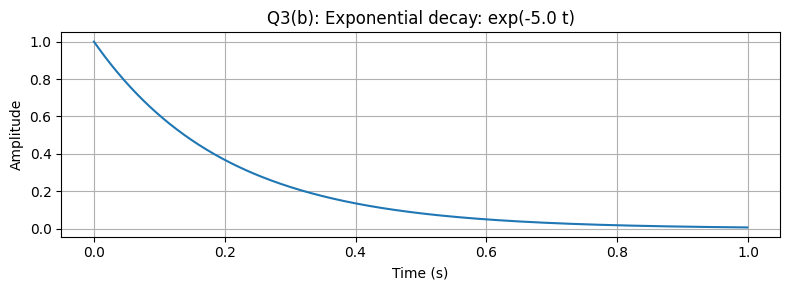

In [20]:
plt.figure(figsize=(8,3))
plt.plot(t, x3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Q3(b): Exponential decay: exp(-{alpha} t)')
plt.grid(True)
plt.tight_layout()
plt.show()

***(c) DTFT***

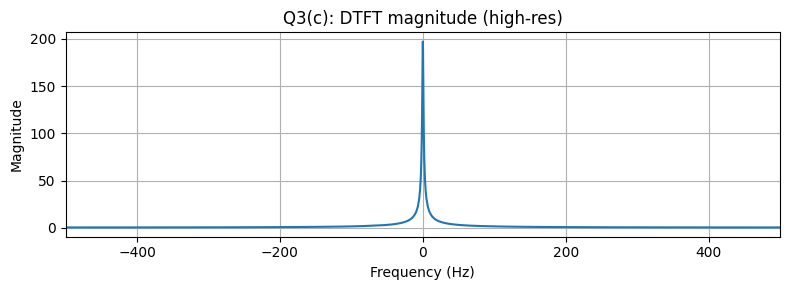

In [21]:
def compute_dtft(x, Fs, Nfreq=4096):
    n = np.arange(len(x))
    f = np.linspace(-Fs/2, Fs/2, Nfreq)
    W = np.exp(-1j * 2 * np.pi * np.outer(n, f) / Fs)
    X = np.dot(x, W)
    return f, X

f_dtft3, X_dtft3 = compute_dtft(x3, Fs, Nfreq=4096)
plt.figure(figsize=(8,3))
plt.plot(f_dtft3, np.abs(X_dtft3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q3(c): DTFT magnitude (high-res)')
plt.xlim(-500, 500)
plt.grid(True)
plt.tight_layout()
plt.show()

***(d) DFT (FFT)***

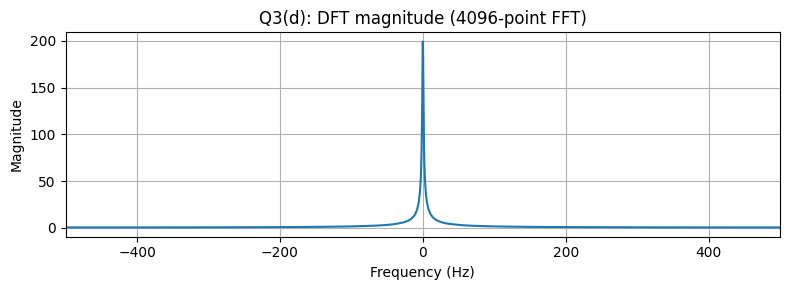

In [22]:
Nfft = 4096
X_fft3 = np.fft.fftshift(np.fft.fft(x3, n=Nfft))
f_fft3 = np.fft.fftshift(np.fft.fftfreq(Nfft, d=1.0/Fs))
plt.figure(figsize=(8,3))
plt.plot(f_fft3, np.abs(X_fft3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q3(d): DFT magnitude (4096-point FFT)')
plt.xlim(-500, 500)
plt.grid(True)
plt.tight_layout()
plt.show()

***Q4: Rectangular pulse of finite duration***

***(a) rectangular pulse: center the pulse to make magnitude symmetric***

In [23]:
pulse_width_sec = 0.05           # 50 ms
L = int(np.round(pulse_width_sec * Fs))
x4 = np.zeros(N)
start = N//2 - L//2
x4[start:start+L] = 1.0          # centered rectangular pulse

***(b) time-domain plot (show small window around center)***

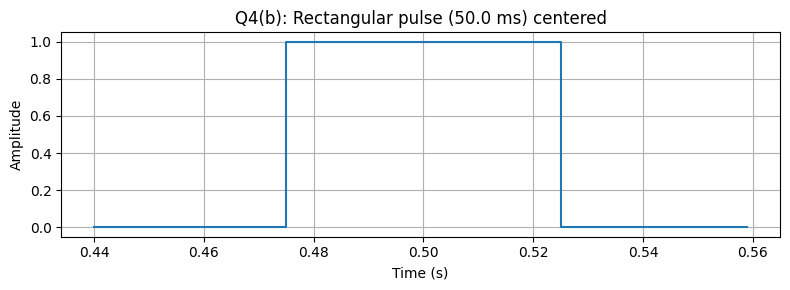

In [24]:
window = slice(N//2 - int(0.06*Fs), N//2 + int(0.06*Fs))
plt.figure(figsize=(8,3))
plt.plot(t[window], x4[window], drawstyle='steps-post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Q4(b): Rectangular pulse ({pulse_width_sec*1000:.1f} ms) centered')
plt.grid(True)
plt.tight_layout()
plt.show()

***(c) DTFT***

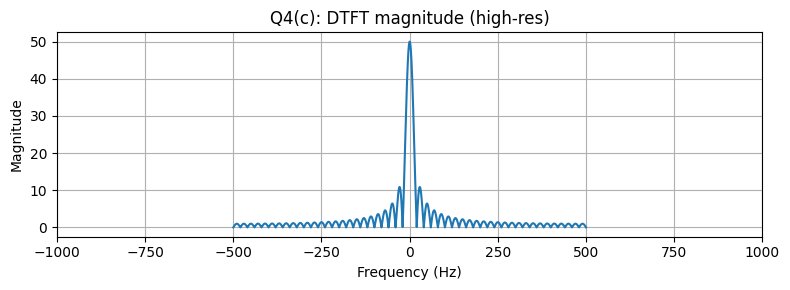

In [25]:
def compute_dtft(x, Fs, Nfreq=8192):
    n = np.arange(len(x))
    f = np.linspace(-Fs/2, Fs/2, Nfreq)
    W = np.exp(-1j * 2 * np.pi * np.outer(n, f) / Fs)
    X = np.dot(x, W)
    return f, X

f_dtft4, X_dtft4 = compute_dtft(x4, Fs, Nfreq=8192)
plt.figure(figsize=(8,3))
plt.plot(f_dtft4, np.abs(X_dtft4))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q4(c): DTFT magnitude (high-res)')
plt.xlim(-1000, 1000)
plt.grid(True)
plt.tight_layout()
plt.show()

***(d) DFT (FFT)***

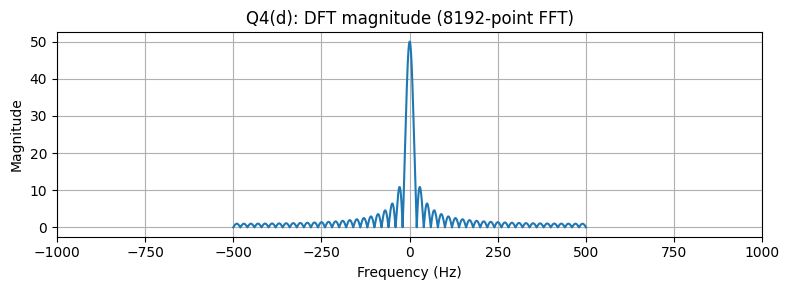

In [26]:
Nfft = 8192
X_fft4 = np.fft.fftshift(np.fft.fft(x4, n=Nfft))
f_fft4 = np.fft.fftshift(np.fft.fftfreq(Nfft, d=1.0/Fs))
plt.figure(figsize=(8,3))
plt.plot(f_fft4, np.abs(X_fft4))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Q4(d): DFT magnitude (8192-point FFT)')
plt.xlim(-1000, 1000)
plt.grid(True)
plt.tight_layout()
plt.show()